# Setup Environment

In [1]:
# display graphs in this notebook
%matplotlib inline

In [2]:
# load statistics library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# this is not mandatory, but makes graphs look better
import seaborn as sns
sns.set_style('ticks')
sns.set_context('notebook',font_scale=1.5)

# Load Data

In [4]:
# load in Penn World Tables
pwt = pd.read_excel('data/pwt80.xlsx','Data').pivot('year','countrycode')

In [5]:
# choose a set of countries
country = ['USA','CHN','KOR','BRA','IND']

# Basic Plotting

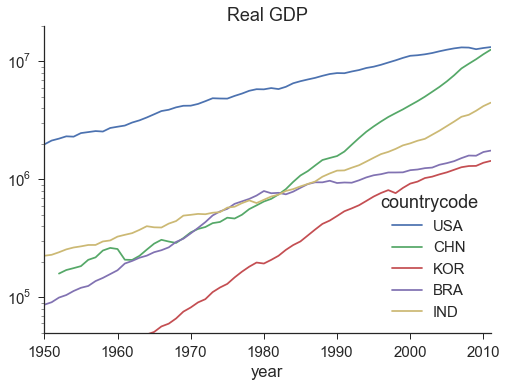

In [6]:
# plot the log of real GDP
pwt['rgdpna'][country].plot(logy=True,title='Real GDP',ylim=(50000,20000000));
sns.despine(); # optional, removes the top and right axes lines

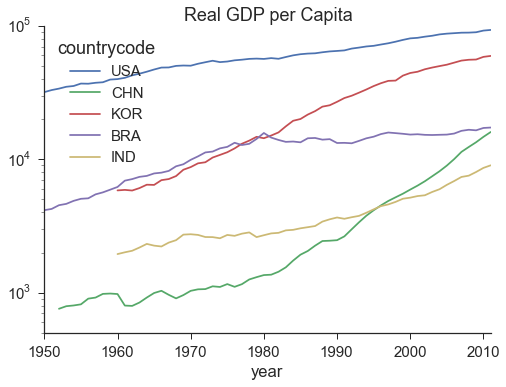

In [7]:
# plot the log of real GDP per capita
rgdp_per = pwt['rgdpna']/pwt['emp']
rgdp_per[country].plot(logy=True,title='Real GDP per Capita',ylim=(500,100000));
sns.despine();

# Country TFP

In [10]:
# calculate TFP
alpha = 0.35
hcap = pwt['hc']*pwt['emp']
ltfp = np.log(pwt['rgdpna']) - alpha*np.log(pwt['rkna']) - (1.0-alpha)*np.log(hcap)
tfp = np.exp(ltfp)

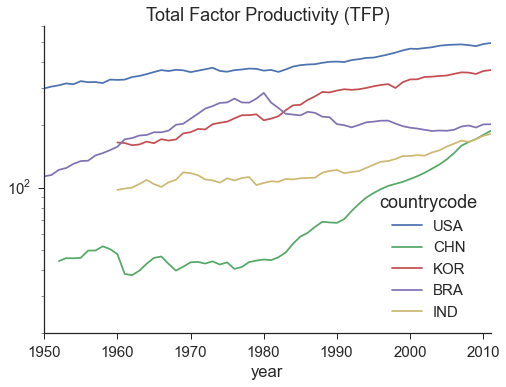

In [11]:
# plot TFP data
tfp[country].plot(logy=True,title='Total Factor Productivity (TFP)',ylim=(20,600))
sns.despine()

# Growth Decomposition

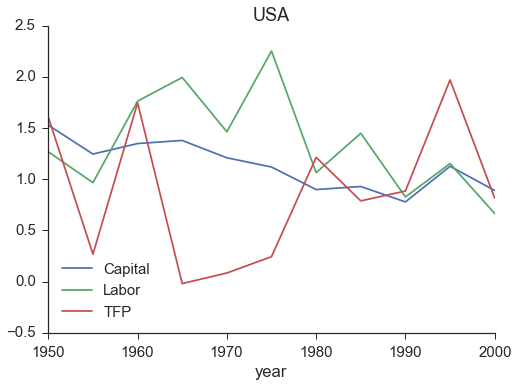

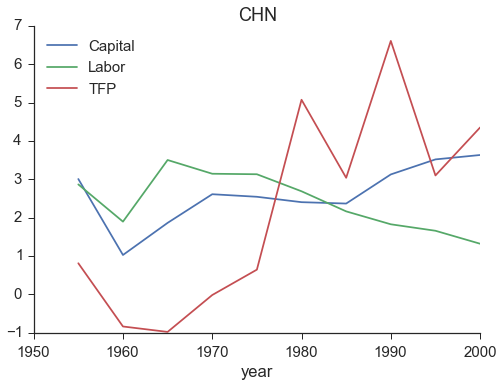

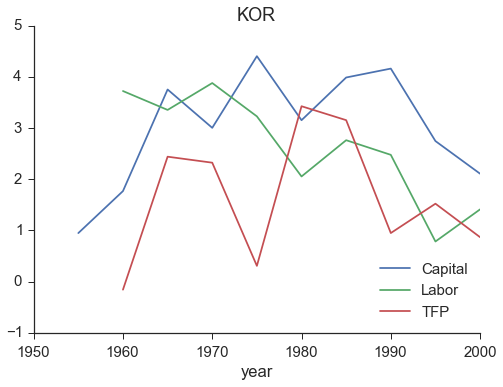

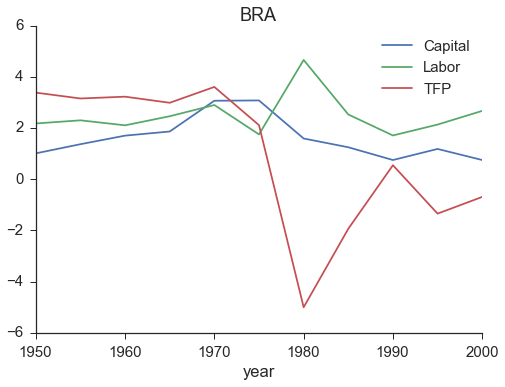

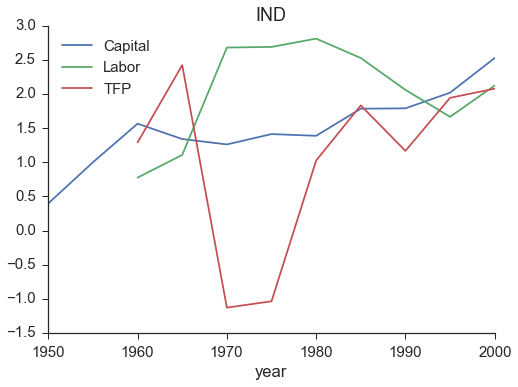

In [13]:
# do growth decomposition into: TFP, capital (physical capital), and labor (human capital)
lcapital = alpha*np.log(pwt['rkna'])
llabor = (1.0-alpha)*np.log(hcap)
for c in country:
    decomp = pd.DataFrame({'TFP':ltfp[c],'Capital':lcapital[c],'Labor':llabor[c]})
    growth = 100*(decomp.diff(5).shift(-5).ix[1950:2000:5]/5) # percentage annualized growth
    growth.plot(title=c)
    sns.despine()